In [38]:
library(tidyverse)
library(repr)
library(tidymodels)
library(RColorBrewer)
library(cowplot)
library(ggplot2)
library(GGally)

# Group proposal on developing predictive model in detecting and preventing forest fires in Algerian regions.

**Introduction**

In the Algerian regions (Northern Africa) of **Bejaia** and **Sidi Bel-abbes** during the period, between June 2012 and September 2012, forest fires ravaged an estimated 20,000 hectares of land. 
Our project aims to construct a prediction model for forest fires and we will use the Algerian Forest Fires Dataset, which contains data from two sub-regions.

Our target variable for this project will be the Classes label fromthe dataset, and we will perform K-nearest neighbours classification algorithm to answer the predictive question.

**Brief explanation**
* Temperature: Degree Celsius
* RH: Relative Humidity (%)
* Ws: Wind speed (km/h)
* ISI (Initial Spread Index): estimation of the anticipated spread of a fire that is based on FFMC. 
* FFMC (fine fuel moisture code): the moisture content based on litter or other fine fuels. 
* DMC (Duff Moisture Code) and DC (Drought Code): is the average rating of moisture in the organic layers of the forest.
* BUI (Buildup Index): the total amount of fuel that can be used for a combustion reaction, this number is based on the DMC and the DC. 
* FWI (Fire Weather Index): the rating of the strength of the fire.



RH vs Ws
The plot shows a moderately weak positive linear relationship as the points are very close to each other; the line of best fit would most likely be a slanted line, slightly going up. This means that RH and Ws have a weak positive correlation as RH increases the wind speed slightly increases as well.

RH vs Rain
This graph also has a weak positive linear relationship, and again since the line of best fin would most likely be a slanted line going up it would show a weak positive correlation. As RH increases so does the amount of rain.

RH vs FFMC

The plot exhibits a negative moderately strong linear relationship. It shows that as the RH decreases the FFMC value goes up as well.

RH vs DMC

The Graph shows a moderate negative linear relationship, the points are grouped together for the most part but there are points away from the cluster. As the RH value decreases the DMC increases.

RH vs DC
This graph has points all scattered throughout, this means that there is no correlation or no relationship between the two variables.


RH vs ISI
This scatterplot conveys a negatively strong linear relationship, where the line of best fit would show a slanted line going down. This means that as the RH goes down the ISI values increases.

RH vs BUI (or no relationship)
The graph exhibits a weak negative linear relationship, some points are scattered making the line of best fit more horizontal. It shows that as RH values decrease the BUI slightly increases as well.

RH vs FWI
This plot shows a negatively strong linear relationship. As RH decreases the FWI values increases. 

Ws vs most variables except classes

Most scatter plots with Ws show no correlation or no relationship with any of the variables. The overall shape of the graph provides no insight with the relationship with each particular variable as all graphs are similar.

Rain vs FFMC 
This graph shows a weak negative non-linear relationship between Rain and FFMC. Where FFMC increases as Rain decreases.

Rain vs DMC/DC/ISI/BUI/FWI

All of these graphs exhibit a strong negative relationship that is non-linear as it would most likely fit a curve rather than a line of best fit. This means that as Rain decreases all the different variables increase. 

FFMC vs DMC/DC/ISI/BUI/FWI
These scatter plots all exhibit a strong positive relationship that is non-linear. Again, it fits a curve rather than a line of best fit. The graphs tells us that as the FFMC increases all the other variables increase as well. 

DMC vs DC/ISI/FWI

The plot shows a moderately strong positive linear relationship. This means that as the DMC increases the DC increases as well.

DMC vs BUI 

The graph shows a very strong linear relationship as the points are very close to each other. This tells us that as the DMC increases the BUI equally increases as well.

DC vs ISI

The plot shows us a moderate positive linear relationship. As the DC increases the ISI increases as well; however some points are far from where the line of best fit would be.

DC vs BUI

The plot shows us a strong positive linear relationship. As the DC increases the BUI also increases almost equally.

DC vs FWI

The graph shows a moderately strong positive linear relationship. As the DC increases the FWI increases as well.

ISI vs BUI
The graph shows a moderately positive linear relationship; there are points that would be a little far from the line of best fit. This means that as the ISI increases the BUI also increases.

ISI vs FWI
The graph shows a strong positive linear relationship. Most points are close to where the line of best fit would be and as the ISI increases the FWI increases as well.

BUI vs FWI 
This plot also has a moderate positive linear relationship. This means that as the BUI increases the FWI increases as well.
# Methods

**Beginning steps**
* Reading data from web-source and converting the columns into correct types for further coding purposes. 
* Wrangling and tidying the data by : Firstly, extracting the two subregions dataset with a mutated column "Region". Secondly, filtering out rows without NA values and non clssified 'Classes' label. Thirdly, combining the tidied datasets into one dataset to work on the predicive problem for the overall Algerian regions.

**Exploratory Steps**
* Initially splitting the dataset into 0.76 training set and 0.24 testing set based on the size of the original dataset, and using only the training dataset throughout the model training process.
* Including set.seed() in necessary cells to ensure the data is reproducible.
* Creating visualization by ggpairs() function to check whether the data is imbalanced as well as determine the predictors for the model specification. 
* Adding plots of predictors respectively for the better undertsanding and demonstration on the data distribution. 

**Model Training and Tuning**
* Creating model specification with tune() (in order to select the best K from following analysis steps).
* Including the selected predictors from the exploratory steps which are FWI, FFMC, BUI, ISI respectively.
* Performing 5-fold cross-validation on the training dataset and chaining together data analysis steps by workflow(); Repeating this process twice with a different set.seed() to see if this would have influence over the best K accuracy estimation.
* Picking a K value that yields the highest accuracy and doesn't decrease accuracy too much when changing it to the nearby ones.

**Evaluating Accuracy**
* Retraining the model with the best K from previous tuning process.
* Predicting the labels in testing set to evaluate classifier's accuracy.

**Visualization of the Analysis**
* Outputing the accuracy statistics in a matrix. 
* Ploting the decision boundaries for the calssificartion result. (Since ther are more than two predictors, two decision boundaries plots will be created)


# Expected Outcomes and Significance

We expect to find that this model will have the ability to predict the existence of future forest fires with an accuracy above 85%, based on the FWI, FFMC, BUI, and ISI of the region. This prediction model can be applied proactively as a means to prevent future forest fires in vulnerable regions, thus making it a valuable environmental tool. 

Scaffolding from this model can be extrapolated to fit the model for regions other than Bejaia and Sidi Bel-abbes, as well as countries other than Algeria. Furthermore, new predictors (that are not included in the data set) could be introduced into the model in the future to see if they would provide better accuracy.

* !!!observed that set.seed() also had influence over K-value, when set.seed is ..., the best K is ..., and when set.seed() is ..., the best K changes to ...
This could be a further exploratory step to .... .... !!! edition needed

In [39]:
#Tidying dataset: extracting the applicable datasets and rbind() them to construct a overall dataset for further analysis steps.

B_forestfire_data <- read_csv("https://raw.githubusercontent.com/zjr-pjt/Proposal-Group-2/main/Algerian_forest_fires_dataset_UPDATE.csv", skip = 1, 
                            col_types = "ncnnnnnnnnnnnf")%>%
                slice(1:124)%>%
                mutate(month = case_when(month == '06' ~ "June",
                                   month == '07' ~ "Jul",
                                   month == '08' ~ "Aug",
                                   month == '09' ~ "Sep"),
                      Region = "Bejaia")%>%
                filter(Classes != 'Classes',
                      !is.na(Classes))
                

S_forestfire_data <- read_csv("https://raw.githubusercontent.com/zjr-pjt/Proposal-Group-2/main/Algerian_forest_fires_dataset_UPDATE.csv", skip = 126, 
                            col_types = "ncnnnnnnnnnnnf")%>%
                mutate(month = case_when(month == '06' ~ "June",
                                   month == '07' ~ "Jul",
                                   month == '08' ~ "Aug",
                                   month == '09' ~ "Sep"),
                      Region = "Sidi Bel-abbes")%>%
                filter(Classes != 'Classes',
                      !is.na(Classes))

#combining two dataset into one for tidyness
forest_fire_data <- rbind(B_forestfire_data, S_forestfire_data)

head(forest_fire_data, n = 3) #table visualization

Warning message:
“16 parsing failures.
row         col   expected      actual                                                                                                       file
123 day         a number   -           'https://raw.githubusercontent.com/zjr-pjt/Proposal-Group-2/main/Algerian_forest_fires_dataset_UPDATE.csv'
123 NA          14 columns 1 columns   'https://raw.githubusercontent.com/zjr-pjt/Proposal-Group-2/main/Algerian_forest_fires_dataset_UPDATE.csv'
124 day         a number   day         'https://raw.githubusercontent.com/zjr-pjt/Proposal-Group-2/main/Algerian_forest_fires_dataset_UPDATE.csv'
124 year        a number   year        'https://raw.githubusercontent.com/zjr-pjt/Proposal-Group-2/main/Algerian_forest_fires_dataset_UPDATE.csv'
124 Temperature a number   Temperature 'https://raw.githubusercontent.com/zjr-pjt/Proposal-Group-2/main/Algerian_forest_fires_dataset_UPDATE.csv'
... ........... .......... ........... ..............................................

day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
1,June,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
2,June,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia
3,June,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia


In [40]:
#Verifying the size of dataset
nrow(forest_fire_data)

[1] 243

**This is a relatively small dataset based on its size.
We decide to slice the data with 76% for the training set and 24% for the testing set, and this would ensure the training set is large enough while still having sufficient data for the testing set to test the accuracy**

In [41]:
set.seed(100) #ensuring to have reproducible data

forest_split <- initial_split(forest_fire_data, prop = 0.76, strata = Classes)

training <- training(forest_split)
testing <- testing(forest_split)

**After splitting the data into testing and training sets, we put the training set through the ggpairs function to visualize relationships among different variables. This allows us to see which predictors would be the strong influencer and helps us to decide how many of them should be included in the model recipe.**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



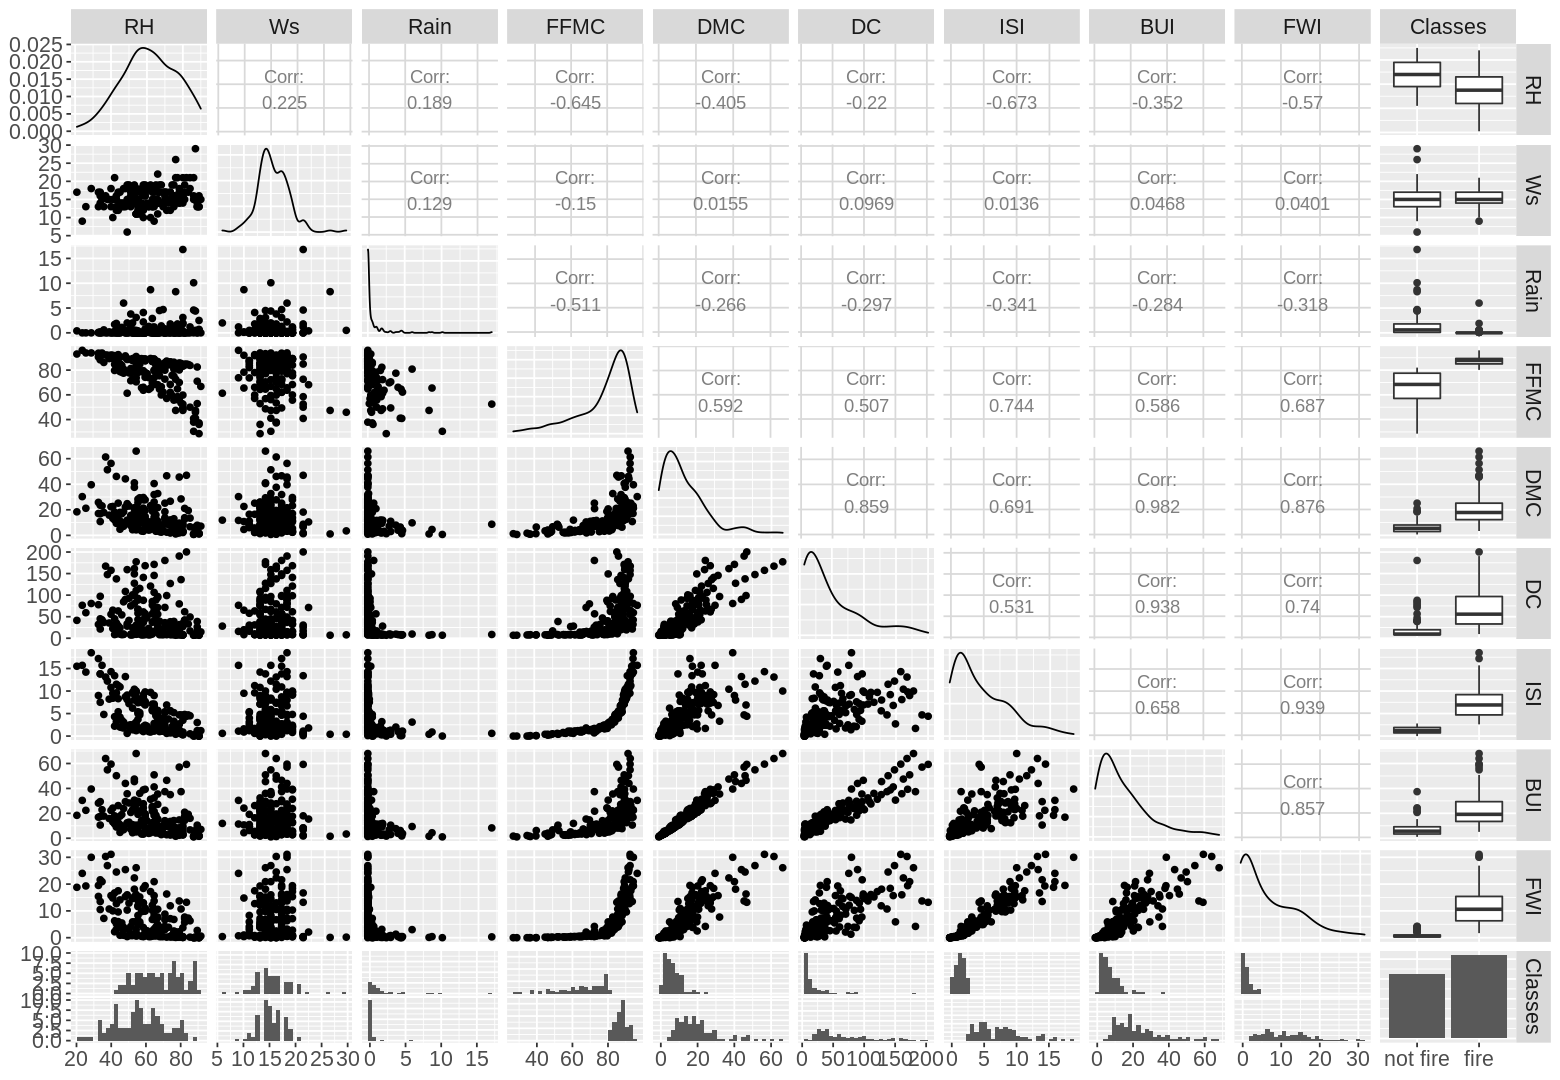

In [42]:
options(repr.plot.width = 13, repr.plot.height = 9)

pairs_plot <- training %>%
        select(RH:Classes) %>%
        ggpairs()+
        theme(text = element_text(size = 16))

pairs_plot

**RH v.s. Ws**
The plot shows a moderately weak positive linear relationship as the points are very close to each other; the line of best fit would most likely be a slanted line, slightly going up. This means that RH and Ws have a weak positive correlation as RH increases the wind speed slightly increases as well.

**RH v.s. Rain**
This graph also has a weak positive linear relationship, and again since the line of best fin would most likely be a slanted line going up it would show a weak positive correlation. As RH increases so does the amount of rain.

**RH v.s. FFMC**
The plot exhibits a negative moderately strong linear relationship. It shows that as the RH decreases the FFMC value goes up as well.

**RH v.s. DMC**
The Graph shows a moderate negative linear relationship, the points are grouped together for the most part but there are points away from the cluster. As the RH value decreases the DMC increases.

**RH v.s. DC**
This graph has points all scattered throughout, this means that there is no correlation or no relationship between the two variables.

**RH v.s. ISI**
This scatterplot conveys a negatively strong linear relationship, where the line of best fit would show a slanted line going down. This means that as the RH goes down the ISI values increases.

**RH v.s. BUI**
The graph exhibits a weak negative linear relationship, some points are scattered making the line of best fit more horizontal. It shows that as RH values decrease the BUI slightly increases as well.

**RH v.s. FWI**
This plot shows a negatively strong linear relationship. As RH decreases the FWI values increases. 

**Ws v.s. Rain/FFMC/DMC/DC/ISI/BUI/FWI**
Most scatter plots with Ws show no correlation or no relationship with any of the variables. The overall shape of the graph provides no insight with the relationship with each particular variable as all graphs are similar.

**Rain v.s. FFMC**
This graph shows a weak negative non-linear relationship between Rain and FFMC. Where FFMC increases as Rain decreases.

**Rain v.s. DMC/DC/ISI/BUI/FWI**
All of these graphs exhibit a strong negative relationship that is non-linear as it would most likely fit a curve rather than a line of best fit. This means that as Rain decreases all the different variables increase. 

**FFMC v.s. DMC/DC/ISI/BUI/FWI**
These scatter plots all exhibit a strong positive relationship that is non-linear. Again, it fits a curve rather than a line of best fit. The graphs tells us that as the FFMC increases all the other variables increase as well. 

**DMC v.s. DC/ISI/FWI**
The plot shows a moderately strong positive linear relationship. This means that as the DMC increases the DC increases as well.

**DMC v.s. BUI**
The graph shows a very strong linear relationship as the points are very close to each other. This tells us that as the DMC increases the BUI equally increases as well.

**DC v.s. ISI**
The plot shows us a moderate positive linear relationship. As the DC increases the ISI increases as well; however some points are far from where the line of best fit would be.

**DC v.s. BUI**
The plot shows us a strong positive linear relationship. As the DC increases the BUI also increases almost equally.

**DC v.s. FWI**
The graph shows a moderately strong positive linear relationship. As the DC increases the FWI increases as well.

**ISI v.s. BUI**
The graph shows a moderately positive linear relationship; there are points that would be a little far from the line of best fit. This means that as the ISI increases the BUI also increases.

**ISI v.s. FWI**
The graph shows a strong positive linear relationship. Most points are close to where the line of best fit would be and as the ISI increases the FWI increases as well.

**BUI v.s. FWI**
This plot also has a moderate positive linear relationship. This means that as the BUI increases the FWI increases as well.


**It's hard to interpret the information from last row without color, but the distributions of ... seems helpful, so ... !!! (needs edition )** feel free to change the format! I was just writing it based on my thoughts:)

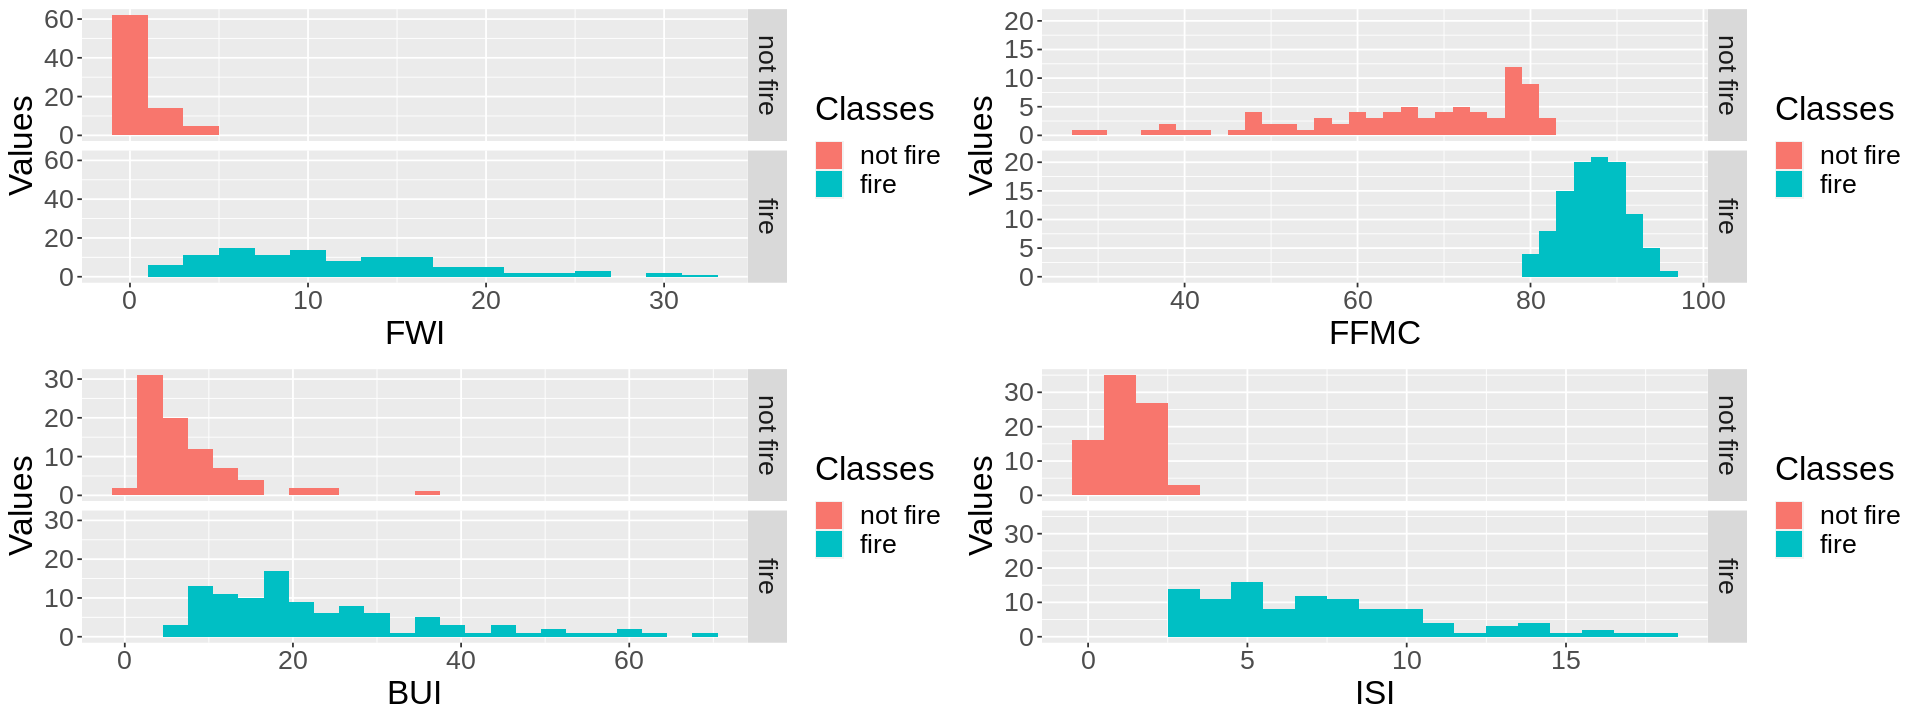

In [43]:
options(repr.plot.width = 16, repr.plot.height = 6)
#ploting the four parameters against Classes respectivey with histogram

fwi_histogram <- ggplot(training, aes(x = FWI,fill = Classes))+
        geom_histogram(binwidth=2)+
        facet_grid(Classes~.)+
        labs(x = "FWI", y = "Values",fill = "Classes")+
        theme(text = element_text(size = 20))

ffmc_histogram <- ggplot(training, aes(x = FFMC,fill = Classes))+
        geom_histogram(binwidth=2)+
        facet_grid(Classes~.)+
        labs(x = "FFMC", y = "Values",fill = "Classes")+
        theme(text = element_text(size = 20))

bui_histogram <- ggplot(training, aes(x = BUI,fill = Classes))+
        geom_histogram(binwidth=3)+
        facet_grid(Classes~.)+
        labs(x = "BUI", y = "Values",fill = "Classes")+
        theme(text = element_text(size = 20))

isi_histogram <- ggplot(training, aes(x = ISI,fill = Classes))+
        geom_histogram(binwidth=1)+
        facet_grid(Classes~.)+
        labs(x = "ISI", y = "Values",fill = "Classes")+
        theme(text = element_text(size = 20))

plot_grid(fwi_histogram, ffmc_histogram, bui_histogram, isi_histogram, ncol = 2)

**FWI** graph shows us that all of the $not-fire$ cases range from the FWI value of zero until 5. While $fire$ cases range from about 2 until above 30. Lower FWI can be a predictor for no fire cases.
The **FFMC** plot shows that most $fire$ cases have higher FFMC values from 80 to about 100, while $not-fire$ cases vary from having FFMC values as low as about 30 until 80. A higher FFMC value can be a predictors for fire cases. 

The **BUI** graph shows that a lower BUI usually means $not-fire$ with the values ranging from 0 to 15 (there are some exceptions where some cases have BUI values of 20 and 35) and higher BUI have more fire cases.
**ISI** graph shows us a similar pattern to the FWI graph and BUI graph where $not-fire$ cases have lower ISI values while $fire$ cases have a higher ISI values.

**Creating Recipes and Specification**


In [44]:
#models and recipes for both regions. 
set.seed(50)

#imporving value of K with tune() in the model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

#recipe with selected predictors
f_recipe <- recipe(Classes ~ FWI + FFMC + BUI + ISI, data = training) %>%
    step_center(all_predictors()) %>%
    step_scale(all_predictors())

Prediction steps:
5-fold cross-validation performed to find best K value from the model tuning process. The accuracy values were graphed against K values to find k with highest accuracy. The parameters strength of fire (FWI), moisture content(FFMC), amount of fuel available for combustion (BUI) and anticipation of spread (ISI) were used to predict how accurate the model works on the testing dataset. The Tune_grid function was used and set = 10 was used to specify tuning to try 10 values of the number of neighbours K to find K with highest accuracy. This process was done twice using a different set.seed() to test if K accuracy estimation change. The model was retrained using the best K from previous tuning process and labels in testing set were predicted to evaluate classifier's accuracy. The tester accuracy was found to be 96%.

In [45]:
set.seed(30)

#5 fold cross-validation on training set
fires_fold <- vfold_cv(training, v = 5, strata = Classes)

#fit the model with a range of 10 K values 
knn_results<- workflow() %>%
    add_recipe(f_recipe)%>%
    add_model(knn_spec)%>%
    tune_grid(resamples = fires_fold, grid= 10) %>%
    collect_metrics()

#extracting accuracy estimations results
accuracies <- knn_results %>%
        filter(.metric == 'accuracy')

#picking the best K from the plot
k_plot <- ggplot(accuracies, aes(x = neighbors , y = mean))+
    geom_point()+
    geom_line()+
    labs(x = "Neighbors", y = "Accuracy Estimate")+
    scale_x_continuous(breaks = seq(0,14, by = 1))+
    theme(text = element_text(size = 14))+
    ggtitle("K Vs. Accuracy")

! Fold1: internal: No observations were detected in `truth` for level(s): 'Classe...

! Fold2: internal: No observations were detected in `truth` for level(s): 'Classe...

! Fold3: internal: No observations were detected in `truth` for level(s): 'Classe...

! Fold4: internal: No observations were detected in `truth` for level(s): 'Classe...

! Fold5: internal: No observations were detected in `truth` for level(s): 'Classe...



! Fold1: internal: No observations were detected in `truth` for level(s): 'Classe...

! Fold2: internal: No observations were detected in `truth` for level(s): 'Classe...

! Fold3: internal: No observations were detected in `truth` for level(s): 'Classe...

! Fold4: internal: No observations were detected in `truth` for level(s): 'Classe...

! Fold5: internal: No observations were detected in `truth` for level(s): 'Classe...



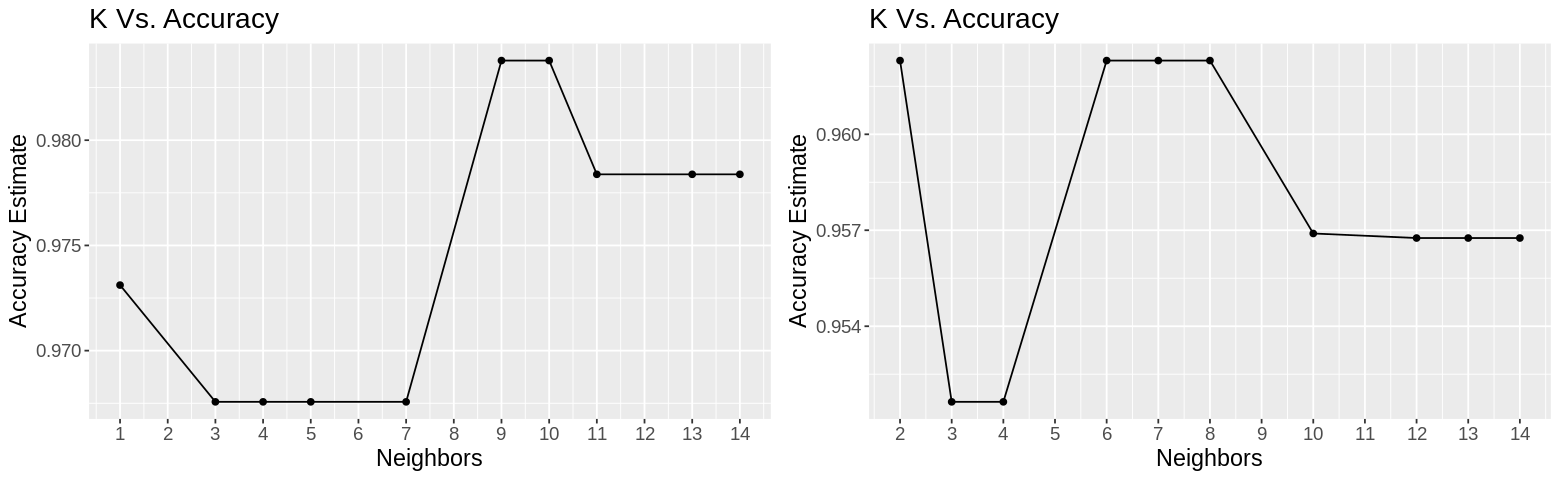

In [46]:
options(repr.plot.width = 13, repr.plot.height = 4)

#steps are the same as previous cell, but we are using a different seed to see if any difference would occur.
set.seed(50)

fires_fold_2 <- vfold_cv(training, v = 5, strata = Classes)

knn_results_2 <- workflow() %>%
    add_recipe(f_recipe)%>%
    add_model(knn_spec)%>%
    tune_grid(resamples = fires_fold_2, grid= 10) %>%
    collect_metrics()

accuracies_2 <- knn_results_2 %>%
        filter(.metric =='accuracy')

k_plot_2 <- ggplot(accuracies_2, aes(x = neighbors , y = mean))+
    geom_point()+
    geom_line()+
    labs(x = "Neighbors", y = "Accuracy Estimate")+
    scale_x_continuous(breaks = seq(0,14, by = 1))+
    theme(text = element_text(size = 14))+
    ggtitle("K Vs. Accuracy") 

#Griding two plors together
plot_grid(k_plot,k_plot_2,ncol=2)

**Best K values**!!! chose from the left one bc... editin needed


In [47]:
#Making new model specification and retraining classifier with the K = 9 

fire_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 9) %>%
        set_engine("kknn")%>%
        set_mode("classification")

fire_fit <- workflow()%>%
        add_recipe(f_recipe)%>%
        add_model(fire_spec)%>%
        fit(data = training)


In [48]:
#Evaluating accuracy of classifier on testing dataset

fire_prediction <- predict(fire_fit, testing)%>%
        bind_cols(testing)

head(fire_prediction, n = 4) #preview on the output

#Computing the accuracy

fire_metrics <- fire_prediction %>%
            metrics(truth = Classes, estimate = .pred_class)

fire_metrics

.pred_class,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
<fct>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
not fire,3,June,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
fire,7,June,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire,Bejaia
not fire,10,June,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,Bejaia
fire,11,June,2012,31,65,14,0.0,84.5,12.5,54.3,4.0,15.8,5.6,fire,Bejaia


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.9649123
kap,multiclass,0.9287500


In [49]:
# plot decision boundaries !!! edition needed